<a href="https://colab.research.google.com/github/VictoriaCar/BA820---College-Scorecard-/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizing Unsupervised ML Techniques on College Scorecard Data to Evaluate Best Value for Money - BA820 A1 Team 7 - Part 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preparation**

## Data Cleaning

### Load and Inspect Data

In [4]:
import pandas as pd

# df = pd.read_csv("/content/drive/MyDrive/BA820 Project/MERGED2022_23_PP.csv")
# df = pd.read_csv("MERGED2022_23_PP.csv")
df = pd.read_csv("/content/drive/MyDrive/2024-2025/Spring Semester/Unsupervised and Unstructured Machine Learning/BA820 Project/MERGED2022_23_PP.csv")

<ipython-input-4-d7dc8a8f6b29>:5: DtypeWarning: Columns (9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/2024-2025/Spring Semester/Unsupervised and Unstructured Machine Learning/BA820 Project/MERGED2022_23_PP.csv")


In [5]:
df.head()

UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   
3  100706   105500.0   1055.0  University of Alabama in Huntsville   
4  100724   100500.0   1005.0             Alabama State University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   
3  Huntsville     AL       35899   
4  Montgomery     AL  36104-0271   

                                        ACCREDAGENCY  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   
3  Southern Association of Colleges and Schools C...   
4  Southern Association of Colleges and Schools C...   

                              INSTURL  \
0                       www.aamu.edu/   
1                https://www.uab.edu/   
2  https://www.amridgeuniversity.edu/   
3                        www.uah.edu/   
4                      www.alasu.edu/   

                                              NPCURL  ...  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...  ...   
1  https://tcc.ruffalonl.com/University of Alabam...  ...   
2           https://www2.amridgeuniversity.edu:9091/  ...   
3                                    finaid.uah.edu/  ...   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...  ...   

   COUNT_WNE_MALE0_P11  COUNT_WNE_MALE1_P11  GT_THRESHOLD_P11  \
0                  NaN                  NaN               NaN   
1                  NaN                  NaN               NaN   
2                  NaN                  NaN               NaN   
3                  NaN                  NaN               NaN   
4                  NaN                  NaN               NaN   

   MD_EARN_WNE_INC1_P11  MD_EARN_WNE_INC2_P11  MD_EARN_WNE_INC3_P11  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   MD_EARN_WNE_INDEP0_P11  MD_EARN_WNE_INDEP1_P11  MD_EARN_WNE_MALE0_P11  \
0                     NaN                     NaN                    NaN   
1                     NaN                     NaN                    NaN   
2                     NaN                     NaN                    NaN   
3                     NaN                     NaN                    NaN   
4                     NaN                     NaN                    NaN   

   MD_EARN_WNE_MALE1_P11  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 3305 columns]

In [6]:
df.shape

(6484, 3305)

**Analysis**

When loading and inspecting the data for the first time, it was clear that we would have to significantly reduce the total number of columns from the initial 3,305. While we intended to employ dimensionality reduction techniques, we knew it would be in our best interest to first try to reduce the number of columns using simple techniques to eliminate objectively incomplete and non-informative features.

Given the context of this project, our initial intention was to keep all rows representing individual colleges and provide a truly comprehensive rating of all US colleges.



In [7]:
df.describe()

UNITID         OPEID        OPEID6  SCH_DEG         HCM2  \
count  6.484000e+03  6.458000e+03   6458.000000      0.0  6484.000000   
mean   2.261726e+06  1.746369e+06  16983.646175      NaN     0.006169   
std    7.805306e+06  2.161007e+06  15226.256135      NaN     0.078307   
min    1.006540e+05  1.002000e+05   1002.000000      NaN     0.000000   
25%    1.742222e+05  3.045250e+05   3035.250000      NaN     0.000000   
50%    2.288965e+05  1.019803e+06  10152.000000      NaN     0.000000   
75%    4.576172e+05  3.083710e+06  30829.750000      NaN     0.000000   
max    4.966450e+07  8.209882e+07  43064.000000      NaN     1.000000   

              MAIN    NUMBRANCH      PREDDEG      HIGHDEG      CONTROL  ...  \
count  6484.000000  6484.000000  6484.000000  6484.000000  6484.000000  ...   
mean      0.788865     3.191703     1.836212     2.247224     2.057989  ...   
std       0.408146     6.809394     1.084154     1.381255     0.832232  ...   
min       0.000000     1.000000     0.000000     0.000000     1.000000  ...   
25%       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
50%       1.000000     1.000000     2.000000     2.000000     2.000000  ...   
75%       1.000000     2.000000     3.000000     4.000000     3.000000  ...   
max       1.000000    52.000000     4.000000     4.000000     3.000000  ...   

       COUNT_WNE_MALE0_P11  COUNT_WNE_MALE1_P11  GT_THRESHOLD_P11  \
count                  0.0                  0.0               0.0   
mean                   NaN                  NaN               NaN   
std                    NaN                  NaN               NaN   
min                    NaN                  NaN               NaN   
25%                    NaN                  NaN               NaN   
50%                    NaN                  NaN               NaN   
75%                    NaN                  NaN               NaN   
max                    NaN                  NaN               NaN   

       MD_EARN_WNE_INC1_P11  MD_EARN_WNE_INC2_P11  MD_EARN_WNE_INC3_P11  \
count                   0.0                   0.0                   0.0   
mean                    NaN                   NaN                   NaN   
std                     NaN                   NaN                   NaN   
min                     NaN                   NaN                   NaN   
25%                     NaN                   NaN                   NaN   
50%                     NaN                   NaN                   NaN   
75%                     NaN                   NaN                   NaN   
max                     NaN                   NaN                   NaN   

       MD_EARN_WNE_INDEP0_P11  MD_EARN_WNE_INDEP1_P11  MD_EARN_WNE_MALE0_P11  \
count                     0.0                     0.0                    0.0   
mean                      NaN                     NaN                    NaN   
std                       NaN                     NaN                    NaN   
min                       NaN                     NaN                    NaN   
25%                       NaN                     NaN                    NaN   
50%                       NaN                     NaN                    NaN   
75%                       NaN                     NaN                    NaN   
max                       NaN                     NaN                    NaN   

       MD_EARN_WNE_MALE1_P11  
count                    0.0  
mean                     NaN  
std                      NaN  
min                      NaN  
25%                      NaN  
50%                      NaN  
75%                      NaN  
max                      NaN  

[8 rows x 2777 columns]

### Drop Columns at Different "Null Thresholds"

In [8]:
# If a column has more than 50% missing values --> drop it
missing_values = df.isnull().sum() / len(df) * 100
cols_missing = missing_values[missing_values > 50]
dropped_df = df.drop(columns = cols_missing.index)

print(f"Columns dropped: {len(cols_missing)}")
print(f"New DataFrame shape: {dropped_df.shape}")

Columns dropped: 2355
New DataFrame shape: (6484, 950)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# To visualize new distribution of missing values of our data
missing_values = dropped_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_values.plot(kind="bar", color="blue")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Distribution by Column")
plt.xticks([])
plt.show()


By looking at the plot we see that we could probably drop all of the columns that have 40-50% missing values. After removing those, the missing value percentage of the columns left drop drastically to around 10%.

In [10]:
# If a column has more than 10% missing values --> drop it
missing_values_updates = dropped_df.isnull().sum() / len(dropped_df) * 100
cols_missing_updates = missing_values_updates[missing_values_updates > 10]
dropped2_df = dropped_df.drop(columns = cols_missing_updates.index)

print(f"Columns dropped: {len(cols_missing_updates)}")
print(f"New DataFrame shape: {dropped2_df.shape}")

Columns dropped: 300
New DataFrame shape: (6484, 650)


In [11]:
dropped2_df.isnull().sum()

UNITID                          0
OPEID                          26
OPEID6                         26
INSTNM                          0
CITY                            0
                             ... 
BBRR4_PP_NOMALE_MAKEPROG        0
BBRR4_PP_NOMALE_PAIDINFULL      0
BBRR4_PP_NOMALE_DISCHARGE       0
CONTROL_PEPS                   30
ADDR                          498
Length: 650, dtype: int64

**Analysis**

As a starting point, we dropped all columns of greater than 50% nulls. Using the 50% threshold, we dropped 2,355 columns, leaving us with 950. While some of these features may have presented valuable information, having to impute over 50% would materially dilute its accuracy. Additionally, given the large number of features in the data, removing these null-heavy columns would likely not undermine any underlying patterns in the data.

After dropping columns at the 50% threshold, we plotted the percentage of nulls in the remaining columns and saw that there were distinct “cliffs” at around 45% and 10%. With that, we realized that dropping all columns greater than 10% null values was acceptable as we believed imputing at or less than 648 of 6,484 would not materially compromise the data accuracy. Using this new threshold resulted in 300 columns being dropped and 650 remaining columns.


### Feature Selection using Qualitative Criteria from ChatGPT

In [12]:
# Selected columns (with specified ones removed)
selected_columns = [
    # Institutional Characteristics
    'PREDDEG',  # Predominant degree awarded
    'HIGHDEG',  # Highest degree awarded
    'CONTROL',  # Type of institution control
    'LOCALE',  # Degree of urbanization
    'CCBASIC',  # Carnegie Classification - Basic
    'CCUGPROF',  # Carnegie Classification - Undergraduate instructional program
    'CCSIZSET',  # Carnegie Classification - Size and setting
    'HBCU',  # Historically Black Colleges and Universities (1 = Yes, 0 = No)
    'HSI',  # Hispanic-Serving Institutions (1 = Yes, 0 = No)
    'DISTANCEONLY',  # Online-only institution (1 = Yes, 0 = No)

    # Location & Region
    'LATITUDE',  # Institution Latitude
    'LONGITUDE',  # Institution Longitude
    'ST_FIPS',  # State FIPS code
    'REGION',  # Geographic region

    # Student Demographics
    'UGDS',  # Total undergraduate student enrollment
    'PPTUG_EF',  # Part-time undergraduate enrollment share
    'UGDS_WHITE',  # White students' share of enrollment
    'UGDS_BLACK',  # Black students' share of enrollment
    'UGDS_HISP',  # Hispanic students' share of enrollment
    'UGDS_ASIAN',  # Asian students' share of enrollment
    'UGDS_AIAN',  # American Indian/Alaska Native share of enrollment
    'UGDS_NHPI',  # Native Hawaiian/Pacific Islander share of enrollment
    'UGDS_2MOR',  # Two or more races share of enrollment
    'UGDS_NRA',  # Non-resident aliens (international students)

    # Academic Offerings
    'PCIP14',  # Percentage of degrees in Engineering
    'PCIP11',  # Percentage of degrees in Computer Science
    'PCIP52',  # Percentage of degrees in Business, Marketing
    'PCIP51',  # Percentage of degrees in Health Professions
    'PCIP42',  # Percentage of degrees in Psychology
    'PCIP26',  # Percentage of degrees in Biological Sciences
    'PCIP45',  # Percentage of degrees in Social Sciences

    # Financials
    'NPT4_PRIV',  # Average net price for private institutions
    'NPT41_PRIV',  # Net price for $0-$30K family income (private)
    'NUM4_PRIV',  # Number of Title IV students (private institutions)

    # Outcomes
    'OMAWDP8_FTFT',  # Outcome metric for award pooling
    'CURROPER'  # School currently operating (1 = Yes, 0 = No)
]

# Filter the dataframe to only include the selected columns
filtered_df = dropped_df[selected_columns]

# Print out the selected column names and shape of the new dataframe
print(filtered_df.columns.tolist())
print(f"New DataFrame shape: {filtered_df.shape}")

['PREDDEG', 'HIGHDEG', 'CONTROL', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'HSI', 'DISTANCEONLY', 'LATITUDE', 'LONGITUDE', 'ST_FIPS', 'REGION', 'UGDS', 'PPTUG_EF', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'PCIP14', 'PCIP11', 'PCIP52', 'PCIP51', 'PCIP42', 'PCIP26', 'PCIP45', 'NPT4_PRIV', 'NPT41_PRIV', 'NUM4_PRIV', 'OMAWDP8_FTFT', 'CURROPER']
New DataFrame shape: (6484, 36)


**Analysis**

Having exhausted our ability to drop columns using null thresholds pragmatically, we needed to find a way to narrow the column count even further. Since there were still 650 remaining, we knew we would have to reduce the number of features using qualitative reasoning. However, having the team comb through all 650 columns to judge what columns to keep and drop would be time-consuming and introduce human error. To remedy this, we fed the 650-column Data Frame and data dictionary into ChatGPT and then asked which columns would be most important to keep to produce a reliable clustering output. This resulted in the 36 features in the code directly above. We felt that this was an ideal usage of Gen AI in a real-world context, as it saved the immense time and effort the team would have spent on this intermediate step.

*ChatGPT promt used to select Columns*

https://chatgpt.com/c/67b1fc08-f6ec-800a-a423-aa1a9c4a5863

In [13]:
filtered_df.isnull().sum()

PREDDEG            0
HIGHDEG            0
CONTROL            0
LOCALE           495
CCBASIC          495
CCUGPROF         495
CCSIZSET         495
HBCU             498
HSI              498
DISTANCEONLY     495
LATITUDE         495
LONGITUDE        495
ST_FIPS            0
REGION             0
UGDS             768
PPTUG_EF         796
UGDS_WHITE       768
UGDS_BLACK       768
UGDS_HISP        768
UGDS_ASIAN       768
UGDS_AIAN        768
UGDS_NHPI        768
UGDS_2MOR        768
UGDS_NRA         768
PCIP14           773
PCIP11           773
PCIP52           773
PCIP51           773
PCIP42           773
PCIP26           773
PCIP45           773
NPT4_PRIV       3052
NPT41_PRIV      3116
NUM4_PRIV       3052
OMAWDP8_FTFT    2975
CURROPER           0
dtype: int64

### Further cleaning on dataset based on feature selection results

In [14]:
# Drop the specified columns from filtered_df
columns_to_drop = ['NPT4_PRIV', 'NPT41_PRIV', 'NUM4_PRIV', 'OMAWDP8_FTFT']

filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')

# Print updated column names and DataFrame shape
print(filtered_df.columns.tolist())
print(f"New DataFrame shape: {filtered_df.shape}")

['PREDDEG', 'HIGHDEG', 'CONTROL', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'HSI', 'DISTANCEONLY', 'LATITUDE', 'LONGITUDE', 'ST_FIPS', 'REGION', 'UGDS', 'PPTUG_EF', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'PCIP14', 'PCIP11', 'PCIP52', 'PCIP51', 'PCIP42', 'PCIP26', 'PCIP45', 'CURROPER']
New DataFrame shape: (6484, 32)


In [15]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Standardize the data before KNN (KNN works better with scaled values)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")  # n_neighbors=5 is default
imputed_data = knn_imputer.fit_transform(scaled_data)

# Convert back to original scale
imputed_df = pd.DataFrame(scaler.inverse_transform(imputed_data), columns=filtered_df.columns)

# Print summary
print("KNN Imputation Completed.")
print(f"Updated DataFrame shape: {imputed_df.shape}")
print(imputed_df.isnull().sum())  # Verify no missing values

KNN Imputation Completed.
Updated DataFrame shape: (6484, 32)
PREDDEG         0
HIGHDEG         0
CONTROL         0
LOCALE          0
CCBASIC         0
CCUGPROF        0
CCSIZSET        0
HBCU            0
HSI             0
DISTANCEONLY    0
LATITUDE        0
LONGITUDE       0
ST_FIPS         0
REGION          0
UGDS            0
PPTUG_EF        0
UGDS_WHITE      0
UGDS_BLACK      0
UGDS_HISP       0
UGDS_ASIAN      0
UGDS_AIAN       0
UGDS_NHPI       0
UGDS_2MOR       0
UGDS_NRA        0
PCIP14          0
PCIP11          0
PCIP52          0
PCIP51          0
PCIP42          0
PCIP26          0
PCIP45          0
CURROPER        0
dtype: int64


In [16]:
imputed_df.head()
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PREDDEG       6484 non-null   float64
 1   HIGHDEG       6484 non-null   float64
 2   CONTROL       6484 non-null   float64
 3   LOCALE        6484 non-null   float64
 4   CCBASIC       6484 non-null   float64
 5   CCUGPROF      6484 non-null   float64
 6   CCSIZSET      6484 non-null   float64
 7   HBCU          6484 non-null   float64
 8   HSI           6484 non-null   float64
 9   DISTANCEONLY  6484 non-null   float64
 10  LATITUDE      6484 non-null   float64
 11  LONGITUDE     6484 non-null   float64
 12  ST_FIPS       6484 non-null   float64
 13  REGION        6484 non-null   float64
 14  UGDS          6484 non-null   float64
 15  PPTUG_EF      6484 non-null   float64
 16  UGDS_WHITE    6484 non-null   float64
 17  UGDS_BLACK    6484 non-null   float64
 18  UGDS_HISP     6484 non-null 

In [17]:
# Convert necessary variables to categorical

categorical_columns = [
    'PREDDEG', 'HIGHDEG', 'CONTROL', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET',
    'HBCU', 'HSI', 'DISTANCEONLY', 'CURROPER', 'ST_FIPS', 'REGION'
]

imputed_df[categorical_columns] = imputed_df[categorical_columns].astype('category')


print(imputed_df.dtypes)

PREDDEG         category
HIGHDEG         category
CONTROL         category
LOCALE          category
CCBASIC         category
CCUGPROF        category
CCSIZSET        category
HBCU            category
HSI             category
DISTANCEONLY    category
LATITUDE         float64
LONGITUDE        float64
ST_FIPS         category
REGION          category
UGDS             float64
PPTUG_EF         float64
UGDS_WHITE       float64
UGDS_BLACK       float64
UGDS_HISP        float64
UGDS_ASIAN       float64
UGDS_AIAN        float64
UGDS_NHPI        float64
UGDS_2MOR        float64
UGDS_NRA         float64
PCIP14           float64
PCIP11           float64
PCIP52           float64
PCIP51           float64
PCIP42           float64
PCIP26           float64
PCIP45           float64
CURROPER        category
dtype: object


# **Analysis Plan**

The data preparation phase of the project uncovered a more granular insight into the team's data. The team had far too many features (over 5000) and was able to reduce them to under 100, as explained above. Additionally, the team imputed null values as we saw fit (columns with <10% nulls). Finally, the team utilized VarianceThreshold to drop any additional features with a variance <0.01. The team then conducted an in-depth EDA phase to explore how the dataset's features interact and to understand how the data is shaped.

The next step is to perform a detailed analysis of the data, through clustering techniques and dimensionality reduction, with the goal of developing an optimized model to identify colleges that provide the best value for money.

For clustering, the team will now compare K-Means and Hierarchical Clustering and evaluate the performance of the methods using the Silhouette Score to measure cluster cohesion and separation. Dendrogram Analysis will also visualize how clusters merge at different distances. Since the team does not know the optimal number of clusters, they will use the Elbow Method to analyze inertia for different values of k. Additionally, the team will experiment with different linkage methods in hierarchical clustering, including MIN, MAX, and Ward’s Method, to determine the most effective clustering structure. Since K-Means performance depends on initialization, the team will test different initialization techniques to improve clustering quality. The team will implement K-Means++, which aims to improve the quality of the clustering through smarter initializations¹. Additionally, the team will explore the Maxim (Furthest Point Heuristic) Initialization, which has been shown to reduce erroneous clusters from 15% to 6% if there is a need after experimenting with K-Means++².

The team will then move on to the dimensionality reduction stage, utilizing PCA, t-SNE, and UMAP as the primary methods. Since the team discovered the data shape as non-linear, they will primarily focus on t-SNE and UMAP, as PCA is better suited for linear data³. t-SNE is effective at preserving local relationships within the data and has been widely used in high-dimensional clustering applications⁴. However, it does not maintain global structures as well as UMAP, which offers superior computational efficiency and scalability for large datasets⁵. By applying these techniques, the team aims to visualize the data structure and improve clustering results by reducing noise from redundant features.

-------------------------------------------------------------------------------

<small> ¹ GeeksforGeeks. ML | KMEANS++ Algorithm. March 21, 2024. https://www.geeksforgeeks.org/ml-k-means-algorithm/.

<small> ² Fränti, P., & Ieranoja, S. “How Much Can K-Means Be Improved by Using Better Initialization and Repeats?” Pattern Recognition 93 (2019): 95–112. https://www.sciencedirect.com/science/article/pii/S0031320319301608.

<small> ³ Jolliffe, Ian T., and Jorge Cadima. "Principal Component Analysis: A Review and Recent Developments." Philosophical Transactions of the Royal Society A 374, no. 2065 (2016): 20150202. https://doi.org/10.1098/rsta.2015.0202.

<small> ⁴ van der Maaten, Laurens, and Geoffrey Hinton. “Visualizing Data Using t-SNE.” Journal of Machine Learning Research 9 (2008): 2579–2605. https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf.

<small> ⁵ McInnes, Leland, John Healy, and James Melville. "UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction." arXiv preprint arXiv:1802.03426 (2018). https://arxiv.org/abs/1802.03426.


# **Preliminary Results**

## EDA

### Correlation Matrix of Numeric Columns

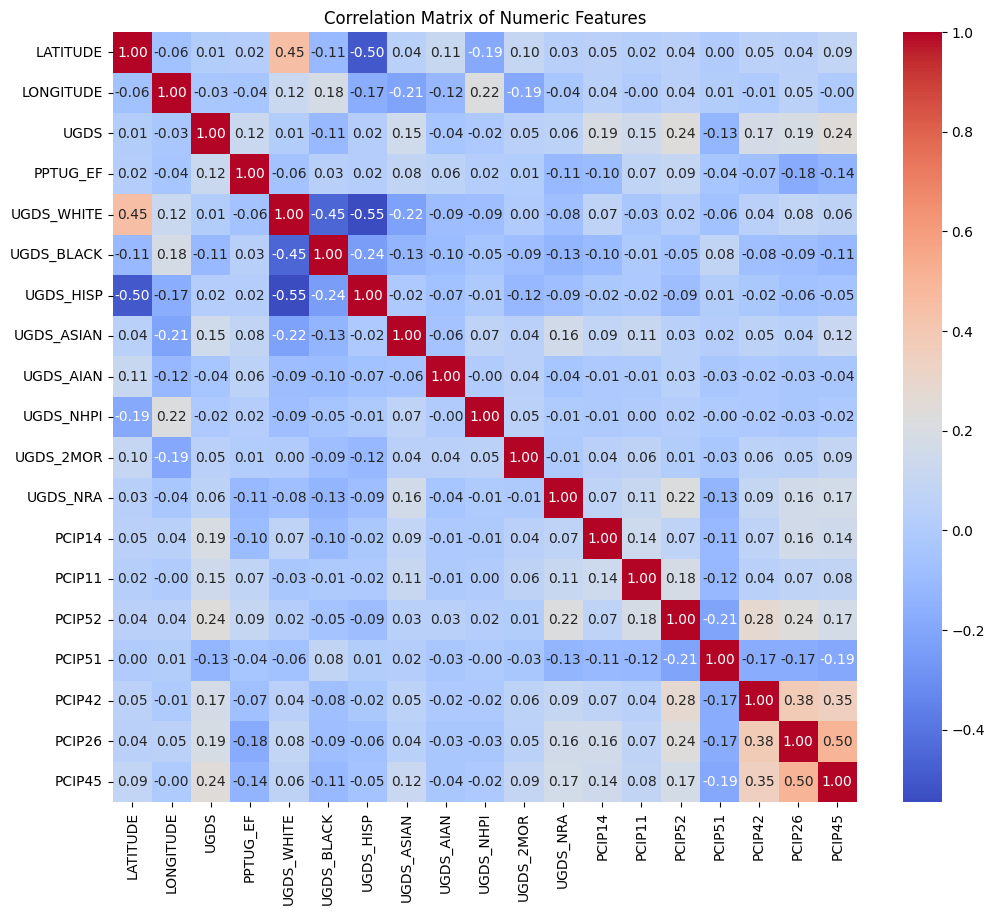

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with only numeric columns
numeric_df = imputed_df.select_dtypes(include=np.number)

# Ignore columns with 'PS' in the row values (assuming you meant column names)
numeric_df = numeric_df.loc[:, ~numeric_df.columns.str.contains('PS')]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Pairplot - Numeric Column Interactions

In [19]:
import matplotlib.pyplot as plt
sns.pairplot(numeric_df)
plt.show()

**Analysis of findings from correlation matrix:**

Positive Correlations:

- BBRR1_FED_UG_DFLT and BBRR1_FED_UG_NOPROG: Strong positive correlation suggests that undergraduate borrowers who are not making progress on their loan repayment are more likely to default within the first year.

- BBRR1_FED_UG_DLNQ and BBRR1_FED_UG_NOPROG: Positive correlation, indicating that borrowers who are delinquent on their loans within the first year are also more likely to not be making progress on repayment.

- TUITFTE and INEXPFTE: Moderate positive correlation, suggesting that institutions with higher tuition and fees per full-time equivalent student also tend to have higher instructional expenses per full-time equivalent student.

- 1-year and 4-year Loan Repayment Outcomes: There are general positive correlations between the 1-year and 4-year loan repayment outcome variables (BBRR1_FED_UG_* and BBRR4_FED_UG_*). This suggests that borrowers who experience difficulties with repayment in the first year are more likely to continue facing challenges in subsequent years.

Negative Correlations:

- BBRR1_FED_UG_MAKEPROG and BBRR1_FED_UG_NOPROG: Strong negative correlation (as expected) indicating that borrowers making progress on loan repayment are less likely to be categorized as not making progress.

- BBRR1_FED_UG_PAIDINFULL and BBRR1_FED_UG_NOPROG: Negative correlation, suggesting that borrowers who have paid their loans in full within the first year are less likely to be categorized as not making progress.

Overall Insights:

The correlation matrix highlights relationships between loan repayment outcomes, particularly the association between lack of progress in repayment and default. It also shows a link between institutional characteristics like tuition and instructional expenses. Understanding these interactions provides valuable insights for further analysis, especially when exploring factors that contribute to student loan repayment success or challenges.

## Dimensionality Reduction

### PCA

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(imputed_df)

In [21]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PCA: {np.sum(explained_variance)*100:.2f}% retained with {data_pca.shape[1]} components.")

Explained Variance by PCA: 95.49% retained with 24 components.


In [22]:
# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

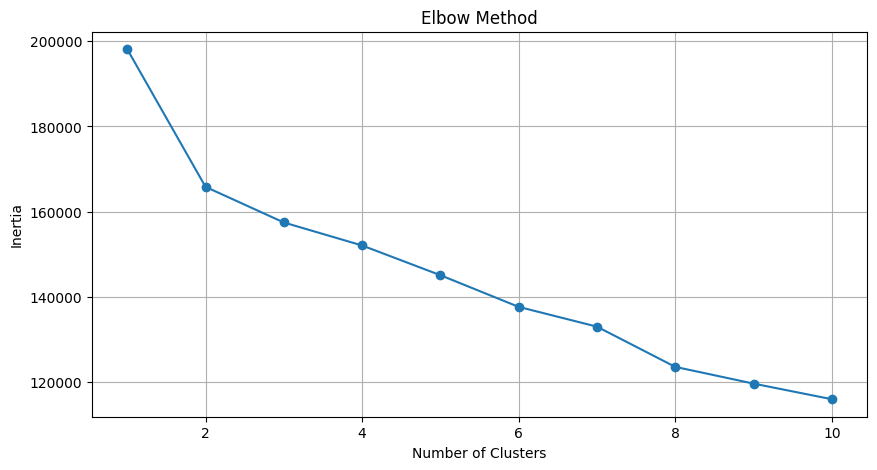

In [23]:
from sklearn.cluster import KMeans

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

# KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_pca)
silhouette_avg = silhouette_score(data_pca, clusters)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}")

Silhouette Score for 4 clusters: 0.1557


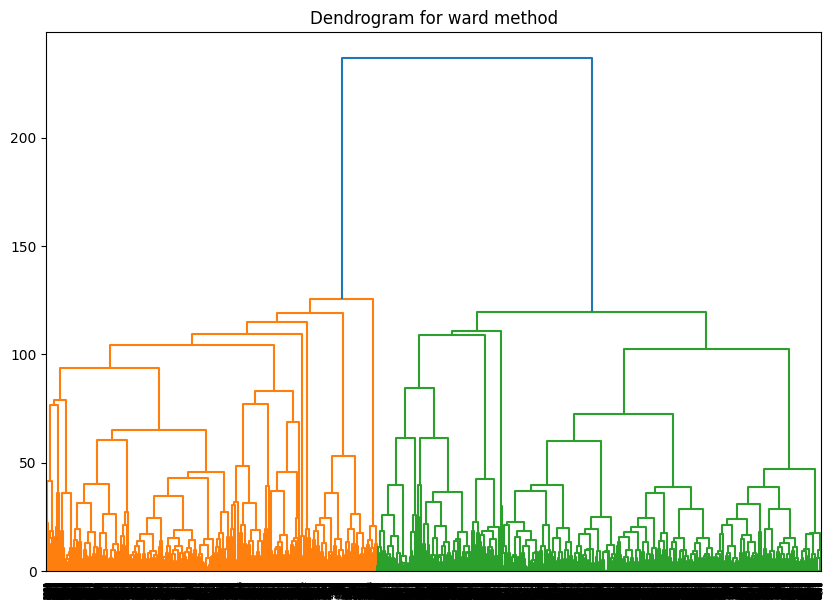

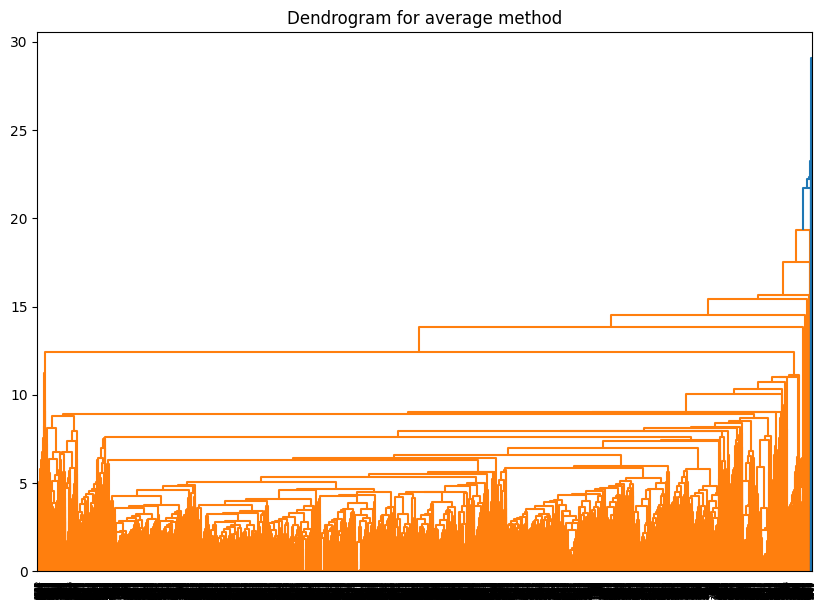

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Performing Hierarchical Clustering
linkage_methods = ['ward', 'complete', 'average']
for method in linkage_methods:
    linked = linkage(data_pca, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram for {method} method')
    plt.show()

In [29]:
# Kmeans method - 4 clusters
print(f'Kmeans Silhouette Score for 4 clusters: {silhouette_avg:.4f}')

# Ward method - 2 clusters
ward_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
ward_labels = ward_clusters.fit_predict(data_pca)
ward_silhouette = silhouette_score(data_pca, ward_labels)
print(f"Ward Silhouette Score for 2 clusters: {ward_silhouette:.4f}")

# Complete method - 3 clusters
complete_clusters = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_labels = complete_clusters.fit_predict(data_pca)
complete_silhouette = silhouette_score(data_pca, complete_labels)
print(f"Complete Silhouette Score for 3 clusters: {complete_silhouette:.4f}")

# Average method - 3 clusters
average_clusters = AgglomerativeClustering(n_clusters=3, linkage='average')
average_labels = average_clusters.fit_predict(data_pca)
average_silhouette = silhouette_score(data_pca, average_labels)
print(f"Average Silhouette Score for 3 clusters: {average_silhouette:.4f}")

Kmeans Silhouette Score for 4 clusters: 0.1557
Ward Silhouette Score for 2 clusters: 0.1900
Complete Silhouette Score for 3 clusters: 0.4822
Average Silhouette Score for 3 clusters: 0.6916


### UMAP & t-SNE

In [25]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
import umap.umap_ as umap

# UMAP
umap_reducer = umap.UMAP()
data_umap = umap_reducer.fit_transform(data_pca)

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_pca)

In [ ]:
# Visualizations
fig_tsne = px.scatter(x=data_tsne[:, 0], y=data_tsne[:, 1], color=clusters, labels={'x': 't-SNE 1', 'y': 't-SNE 2'}, title='t-SNE Clustering')
fig_umap = px.scatter(x=data_umap[:, 0], y=data_umap[:, 1], color=clusters, labels={'x': 'UMAP 1', 'y': 'UMAP 2'}, title='UMAP Clustering')
fig_tsne.show()
fig_umap.show()

In [ ]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

clusters_umap = kmeans.fit_predict(data_umap)
silhouette_umap = silhouette_score(data_pca, clusters_umap)
print(f"UMAP Silhouette Score: {silhouette_umap}")

clusters_tsne = kmeans.fit_predict(data_tsne)
silhouette_tsne = silhouette_score(data_pca, clusters_tsne)
print(f"t-SNE Silhouette Score: {silhouette_tsne}")

# **Next Steps**

Based on our preliminary results, we have created a detailed plan of further action to be taken on our dataset and model, with the intentions of ultimately being able to rate and rank colleges based on their value:

1) Develop actionable insights based on analysis of cluster characteristics: we will now analyze the characteristics of each cluster based on the original features. This will help us understand what makes each cluster unique and to identify the main factors driving the clustering. Based on the cluster analysis, we will then generate actionable insights for prospective students (our main stakeholders). This will include recommendations for colleges based on student's areas of academic interests, finances, and desired outcomes. We aim to provide personalized recommendations by matching student profiles to the specific clusters we created that best align with their needs.


2) Map clustered results back to the original feature space to identify universities and their characteristics. This includes using inverse transform to reconstruct the approximate values of the original variables. We will then merge the original dataset with the cluster labels based on the row index and make sure our variable "UNITID" is included, which has the insitution ID. By mapping our results back to original variables, we will be able to analyze why each university falls into a given cluster but will also allow us to check the validity of our results and assess if any modifications are necessary.